# PARCIAL 2 

## *Estefanny Jaimes León y Jose Alexander Ríos.*

Una empresa productora de vinos requiere el desarrollo de un clasificador con el fin de separar sus variantes de acuerdo a una medida de calidad. Para ello se dispone de una base de datos con 11 variables de entrada y una variable de salida que asigna cada muestra a una medida de calidad de 3 a 8.

La base de datos esta disponible en el siguiente enlace:

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

La empresa requiere que se haga un análisis y se le sugiera cuales son las características que mejor se asocian a la calidad del vino y cual es el mejor esquema de clasificación. Se sugiere unir la clase 8 con la 7 y la 3 con la 4. De esa forma se tendrían solo las clases 4 (inferior), 5 (media), 6 (buena) y 7 (superior).

Para responder a los requerimientos se debe realizar lo siguiente:

·         Implementar al menos 2 clasificadores (se puede utilizar el paquete scykit-learn).

·         Para las medidas de rendimiento del clasificador se debe realizar validación por k-fold cross validation. Se debe reportar media y desviación estándar en dichas medidas.

·         Verificar que no se tengan datos faltantes y realizar algún proceso de normalización o estandarización de los datos.

·         Para cada clasificador se debe realizar un proceso de optimización de los hiperparametros.

·         Para cada clasificador implementar un proceso de selección de características. El proceso debe contemplar el esquema completo de normalización, selección de hiperparametros y selección de características (puede ser implementado en un pipeline).

·         Realizar un reporte en el cual se describa una comparación de los resultados (mostrando las medidas de rendimiento tanto en la validación cruzada como en el conjunto de test). Con base a los datos seleccionar el mejor modelo para el problema de clasificación trabajado.  Indicar para que clases se tiene un mejor desempeño (medir F1 score por clase y mostrar la matriz de confusión del mejor modelo).

Entregar el código y el reporte (se puede realizar todo en un Notebook).



In [ ]:
import warnings
from numpy import unique
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

! git clone https://github.com/ijrios/db_repositorio.git

# Cargamos el archivo CSV en un DataFrame de pandas
dataset = pd.read_csv('/content/db_repositorio/winequality-red.csv')


fatal: destination path 'db_repositorio' already exists and is not an empty directory.


In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Analisis de los datos

In [ ]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

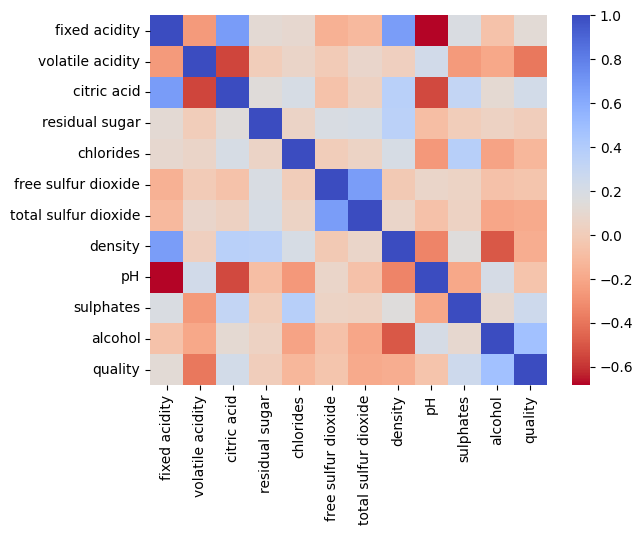

In [ ]:
### Verla como heatmap
import seaborn as sns
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm_r')

### Podemos observar que hay algunas caracteristicas que tienen una correlación un poco alta, por ejemplo "citric acid" y "fixed acidity" o también "free sulfur dioxide" y "total sulfur dioxide", y "density" y "fixed acidity".

In [ ]:
print("DATOS NULOS")
print("Col -                Datos")
print(dataset.isnull().sum())

DATOS NULOS
Col -                Datos
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Como podemos observar no hay ningun campo con datos nulos

In [ ]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
def results_crossValidation (cv_data):
  results_df = pd.DataFrame(cv_data)
  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(
      results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
  ).rename_axis("kernel")
  return(results_df)

In [ ]:
import numpy as np

values = dataset.values
X, y = values[:, :-1], values[:, -1]
# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 1599
N Inputs: 11
N Classes: 6
Classes: [3. 4. 5. 6. 7. 8.]
Class Breakdown:
 - Class 3.0: 10 (0.62539%)
 - Class 4.0: 53 (3.31457%)
 - Class 5.0: 681 (42.58912%)
 - Class 6.0: 638 (39.89994%)
 - Class 7.0: 199 (12.44528%)
 - Class 8.0: 18 (1.12570%)


<Axes: xlabel='class', ylabel='count'>

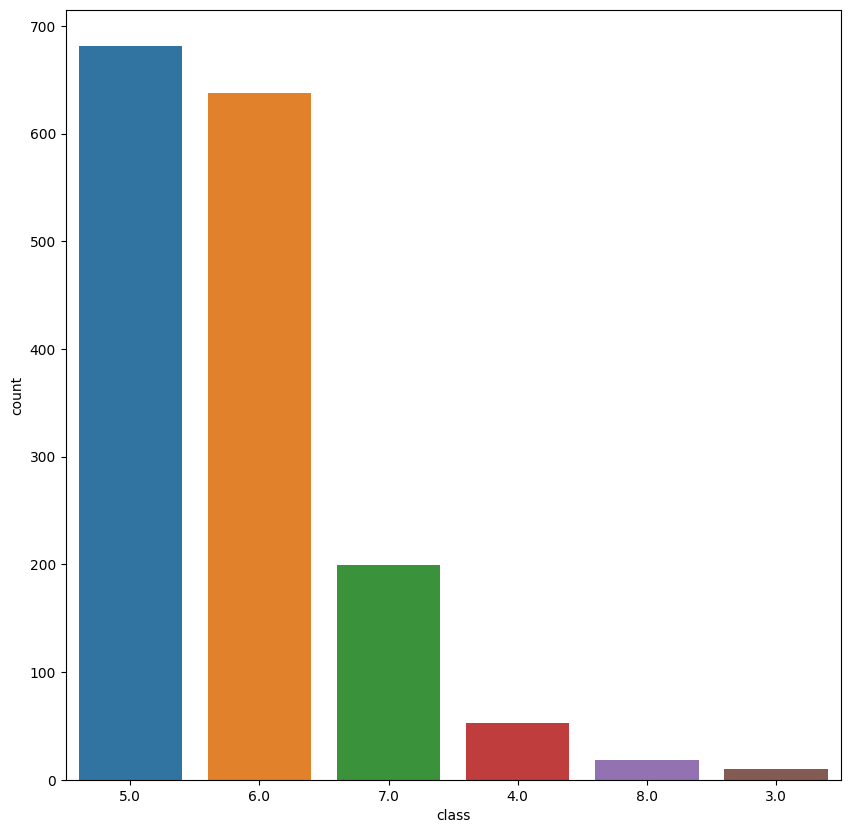

In [ ]:
df = pd.DataFrame(X, columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11',])
df.insert(1, "class", y)
plt.figure(figsize=(10,10))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)

### Este caso está desbalanceado.

# Combinación de clases

#### Como podemos observar la clase 3 y 4 tienen pocos datos, por lo tanto, debemos combinarla, al igual que la clase 7 y 8.

In [ ]:
np.set_printoptions(threshold=np.inf, precision=2, linewidth=120)
class_to_combine = [4, 3]
new_class = 4
y = np.where(np.isin(y, class_to_combine), new_class, y)

In [ ]:
set(y)

{4.0, 5.0, 6.0, 7.0, 8.0}

In [ ]:
class_to_combine_2 = [7, 8]
new_class_2 = 7
y = np.where(np.isin(y, class_to_combine_2), new_class_2, y)

In [ ]:
set(y)

{4.0, 5.0, 6.0, 7.0}

In [ ]:
y.size

1599

# Separación de datos de entrenamiento y test, normalización

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
#print(X_train_scaled)

# Seleccionamos las mejores caracteristicas

In [ ]:
# Calcular la importancia de las características
corr_matrix = np.corrcoef(X_train_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
feature_importance = np.abs(eigenvectors[0])

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Seleccionar características
k_best = SelectKBest(score_func=f_classif, k=7) # selecciona las 7 mejores características
X_train_scaled_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_scaled_selected = k_best.transform(X_test_scaled)
k_best.fit(X_train_scaled, y_train)
selected_features = k_best.get_support(indices=True)
# Mostrar las características seleccionadas
print("Las mejores características son:")
print(selected_features)

Las mejores características son:
[ 0  1  2  6  7  9 10]


In [ ]:
for features in selected_features:
  print(dataset.columns[features])

fixed acidity
volatile acidity
citric acid
total sulfur dioxide
density
sulphates
alcohol


### Las mejores 7 caracteristicas son:
- fixed acidity
- volatile acidity
- citric acid
- total sulfur dioxide
- density
- sulphates
- alcohol

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
# Crear objeto clasificador
clf = RandomForestClassifier()

# Validación cruzada con selección de características
scores = []
for i in range(1, 12):
    sfm = SelectFromModel(clf, threshold=-np.inf, max_features=i)
    X_transformed = sfm.fit_transform(X, y)
    score = cross_val_score(clf, X_transformed, y, cv=5).mean()
    scores.append(dataset.columns[i])
    scores.append(score)

# Mostrar resultados
print(scores)

['volatile acidity', 0.514676724137931, 'citric acid', 0.4759032131661442, 'residual sugar', 0.5328467868338558, 'chlorides', 0.5997609717868339, 'free sulfur dioxide', 0.5791261755485894, 'total sulfur dioxide', 0.5922648902821317, 'density', 0.5734972570532916, 'pH', 0.584757053291536, 'sulphates', 0.5703565830721004, 'alcohol', 0.5759952978056425, 'quality', 0.5859933385579937]


#### Como se evidencia la mayoría de las caracteristicas tienen resultados similares al realizar la validación cruzada de cada una, por lo tanto, todas son importantes para el proceso, sin embargo, vamos a mostrar dos posibles escenarios, implementando los clasificadores para todas las caracteristicas y para las mejores caracteristicas. 

# Implementación del primer clasificador (Perceptrón)

Primero implementaremos el clasificador perceptron con todas las caracteristicas y luego lo implementamos con las 8 mejores caracteristicas

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10))

In [ ]:
clf.fit(X_train_scaled, y_train) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), solver='lbfgs')

In [ ]:
y_pred_train=clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.6730608840700584

In [ ]:
y_pred=clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6375

Vamos a verificar el rendimiento del modelo. 
Teniendo en cuenta que estamos trabajando con un modelo multiclases y desbalanceado, es importante revisar el F1-macro. La exactitud (accuracy) no es recomendable en sistemas desbalanceados. Igualmente es importante revisar el F1-score por clase.

## Analizamos la matriz de confusión y el f1-score antes de ajustar parametros, con todas las caracteristicas, y el primer clasificador.

In [ ]:
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

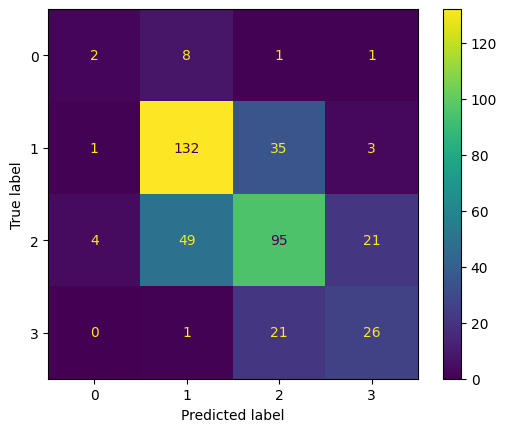

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.29      0.17      0.21        12
         5.0       0.69      0.77      0.73       171
         6.0       0.62      0.56      0.59       169
         7.0       0.51      0.54      0.53        48

    accuracy                           0.64       400
   macro avg       0.53      0.51      0.51       400
weighted avg       0.63      0.64      0.63       400



#### Podemos observar que la clase con mejor f1-score es la clase 5, donde 131 eran de la clase 5 (verdaderos positivos), y hay muchos errores de predicción en la clase 4, vamos a mirar las demás matrices de confusión. 

## Ajuste de hiperparametros para el clasificador perceptrón

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'hidden_layer_sizes':[[5,2], [5,5], 10, 15, 25, 50],
              'alpha':[0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(5),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_scaled, y_train.flatten())

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, hidden_layer_sizes=5,
                                     max_iter=5000, random_state=123),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'hidden_layer_sizes': [[5, 2], [5, 5], 10, 15, 25,
                                                50]},
             return_train_score=True, scoring='accuracy')

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.607):
{'alpha': 0.001, 'hidden_layer_sizes': 10}


In [ ]:
results=results_crossValidation(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
kernel,,,,,,,,,,,,,,,,,,,,,
0.001_10,1.216158,0.150426,0.001129,0.000142,0.001,10,"{'alpha': 0.001, 'hidden_layer_sizes': 10}",0.629167,0.566667,0.579167,...,0.607172,0.031992,1,0.604797,0.629823,0.630865,0.607925,0.621875,0.619057,0.010868
0.001_10,1.051770,0.093069,0.001049,0.000011,0.001,10,"{'alpha': 0.001, 'hidden_layer_sizes': 10}",0.629167,0.566667,0.579167,...,0.607172,0.031992,1,0.604797,0.629823,0.630865,0.607925,0.621875,0.619057,0.010868
0.1_10,0.978951,0.040507,0.001053,0.000035,0.1,10,"{'alpha': 0.1, 'hidden_layer_sizes': 10}",0.625000,0.554167,0.579167,...,0.604665,0.038725,3,0.606882,0.632951,0.627737,0.599583,0.615625,0.616556,0.012461
0.01_10,1.279970,0.319329,0.001300,0.000305,0.01,10,"{'alpha': 0.01, 'hidden_layer_sizes': 10}",0.633333,0.570833,0.570833,...,0.604662,0.033681,4,0.611053,0.628780,0.632951,0.613139,0.621875,0.621560,0.008524
0.1_25,2.057058,0.663184,0.001143,0.000169,0.1,25,"{'alpha': 0.1, 'hidden_layer_sizes': 25}",0.629167,0.550000,0.583333,...,0.603828,0.038719,5,0.608968,0.631908,0.642336,0.620438,0.632292,0.627188,0.011448
"0.1_[5, 2]",0.908277,0.108414,0.001062,0.000016,0.1,"[5, 2]","{'alpha': 0.1, 'hidden_layer_sizes': [5, 2]}",0.616667,0.550000,0.579167,...,0.601339,0.035162,6,0.606882,0.615224,0.617310,0.596455,0.611458,0.609466,0.007411
"0.001_[5, 2]",1.541428,0.300473,0.001386,0.000174,0.001,"[5, 2]","{'alpha': 0.001, 'hidden_layer_sizes': [5, 2]}",0.633333,0.545833,0.570833,...,0.601332,0.040725,7,0.601668,0.621481,0.618352,0.589155,0.605208,0.607173,0.011734
"0.001_[5, 2]",1.022950,0.189522,0.001249,0.000387,0.001,"[5, 2]","{'alpha': 0.001, 'hidden_layer_sizes': [5, 2]}",0.633333,0.545833,0.570833,...,0.601332,0.040725,7,0.601668,0.621481,0.618352,0.589155,0.605208,0.607173,0.011734
0.001_50,4.597374,0.665666,0.001482,0.000532,0.001,50,"{'alpha': 0.001, 'hidden_layer_sizes': 50}",0.641667,0.562500,0.566667,...,0.601315,0.040393,9,0.663191,0.678832,0.679875,0.661105,0.663542,0.669309,0.008250


Aplicamos los mejores parametros y los organizamos nuevamente en el clasificador para ver el rendimiento

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=50)

In [ ]:
clf.fit(X_train_scaled, y_train) 

MLPClassifier(alpha=0.1, hidden_layer_sizes=50, solver='lbfgs')

In [ ]:
y_pred_train=clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.6872393661384487

In [ ]:
y_pred=clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.63

#### Observamos que aún haciendo ajustes de hiperparametros el metodo no muestra mejoras, por eso se debe elegir las mejores caracteristicas o utilizar otro metodo de clasificacion. 

## Analizamos la matriz de confusión y el f1-score despues de ajustar parametros, con todas las caracteristicas y el primer clasificador.

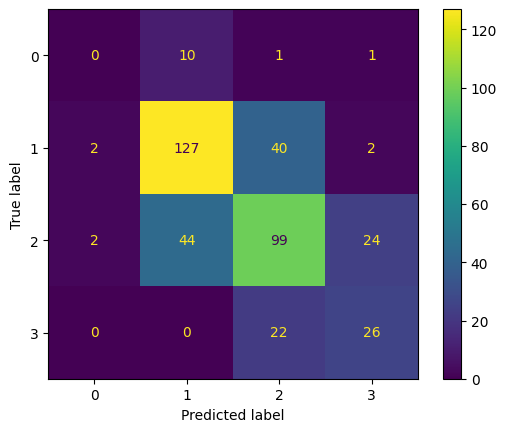

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        12
         5.0       0.70      0.74      0.72       171
         6.0       0.61      0.59      0.60       169
         7.0       0.49      0.54      0.51        48

    accuracy                           0.63       400
   macro avg       0.45      0.47      0.46       400
weighted avg       0.62      0.63      0.62       400



## Ajuste de hiperparámetros para el clasificador perceptrón para las mejores caracteristicas

In [ ]:
grid.fit(X_train_scaled_selected, y_train.flatten())
# Imprimimos los mejores hiperparámetros encontrados
print('Mejores hiperparámetros encontrados:')
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'alpha': 0.001, 'hidden_layer_sizes': 15}


In [ ]:
results=results_crossValidation(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
kernel,,,,,,,,,,,,,,,,,,,,,
0.001_15,2.108712,0.689706,0.001202,0.000178,0.001,15,"{'alpha': 0.001, 'hidden_layer_sizes': 15}",0.616667,0.579167,0.583333,...,0.608839,0.028448,1,0.612096,0.625652,0.632951,0.604797,0.627083,0.620516,0.010413
0.001_15,2.025829,0.466744,0.001283,0.000174,0.001,15,"{'alpha': 0.001, 'hidden_layer_sizes': 15}",0.616667,0.579167,0.583333,...,0.608839,0.028448,1,0.612096,0.625652,0.632951,0.604797,0.627083,0.620516,0.010413
0.01_15,1.980499,0.341865,0.001106,0.000143,0.01,15,"{'alpha': 0.01, 'hidden_layer_sizes': 15}",0.616667,0.579167,0.575000,...,0.607172,0.030091,3,0.617310,0.627737,0.627737,0.605839,0.625000,0.620725,0.008365
0.001_50,3.672372,1.077756,0.001181,0.000168,0.001,50,"{'alpha': 0.001, 'hidden_layer_sizes': 50}",0.583333,0.570833,0.620833,...,0.606339,0.027951,4,0.646507,0.652763,0.661105,0.636079,0.651042,0.649499,0.008207
0.001_50,3.468976,0.797123,0.001086,0.000026,0.001,50,"{'alpha': 0.001, 'hidden_layer_sizes': 50}",0.583333,0.570833,0.620833,...,0.606339,0.027951,4,0.646507,0.652763,0.661105,0.636079,0.651042,0.649499,0.008207
"0.01_[5, 2]",2.396950,0.461729,0.001192,0.000214,0.01,"[5, 2]","{'alpha': 0.01, 'hidden_layer_sizes': [5, 2]}",0.612500,0.562500,0.591667,...,0.603835,0.028512,6,0.592284,0.615224,0.604797,0.591241,0.612500,0.603209,0.009958
"0.001_[5, 2]",2.215458,0.341602,0.001108,0.000151,0.001,"[5, 2]","{'alpha': 0.001, 'hidden_layer_sizes': [5, 2]}",0.616667,0.562500,0.587500,...,0.602162,0.029500,7,0.595412,0.615224,0.603754,0.589155,0.606250,0.601959,0.008993
"0.001_[5, 2]",2.262126,0.303682,0.001241,0.000260,0.001,"[5, 2]","{'alpha': 0.001, 'hidden_layer_sizes': [5, 2]}",0.616667,0.562500,0.587500,...,0.602162,0.029500,7,0.595412,0.615224,0.603754,0.589155,0.606250,0.601959,0.008993
"0.001_[5, 5]",0.914620,0.025442,0.001034,0.000043,0.001,"[5, 5]","{'alpha': 0.001, 'hidden_layer_sizes': [5, 5]}",0.629167,0.562500,0.570833,...,0.599658,0.032584,9,0.603754,0.610010,0.604797,0.587070,0.607292,0.602585,0.008053


In [ ]:
# Evaluamos el modelo utilizando el conjunto de prueba y reportamos las métricas de clasificación
y_pred = grid.predict(X_test_scaled_selected)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM: {:.2f}".format(accuracy))

Precisión del modelo SVM: 0.64


## Analizamos la matriz de confusión y el f1-score despues de ajustar parametros, con las mejores caracteristicas y el primer clasificador.

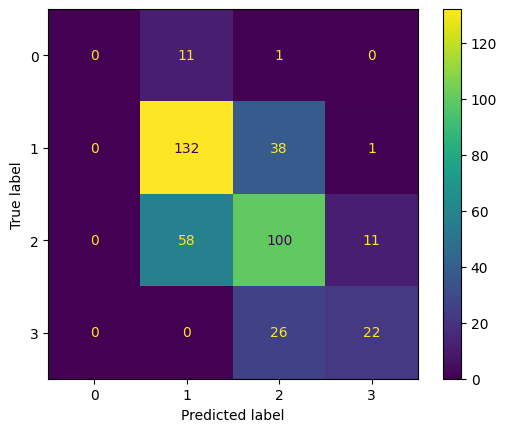

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        12
         5.0       0.66      0.77      0.71       171
         6.0       0.61      0.59      0.60       169
         7.0       0.65      0.46      0.54        48

    accuracy                           0.64       400
   macro avg       0.48      0.46      0.46       400
weighted avg       0.61      0.64      0.62       400



# Implementación del segundo clasificador Support vector machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
# Crear un modelo de SVM con kernel lineal
svm = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
# Entrenar el modelo SVM
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm.predict(X_test_scaled)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM: {:.2f}".format(accuracy))

Precisión del modelo SVM: 0.59


## Analizamos la matriz de confusión y el f1-score antes de ajustar parametros, con todas las caracteristicas, y el segundo clasificador.

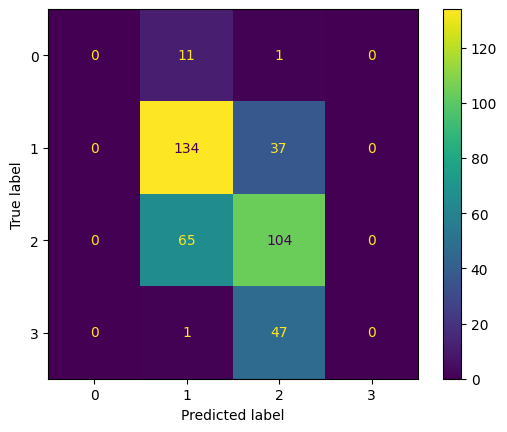

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        12
         5.0       0.64      0.78      0.70       171
         6.0       0.55      0.62      0.58       169
         7.0       0.00      0.00      0.00        48

    accuracy                           0.59       400
   macro avg       0.30      0.35      0.32       400
weighted avg       0.50      0.59      0.55       400



## Ajuste de hiperparámetros para el clasificador SVM

In [ ]:
# Definimos los posibles valores de los hiperparámetros que queremos probar
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]}


grid = GridSearchCV(
        estimator = SVC(kernel = 'linear',
                        C = 0,
                        gamma = 'auto',
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_scaled, y_train.flatten())

GridSearchCV(cv=5,
             estimator=SVC(C=0, gamma='auto', kernel='linear', max_iter=5000,
                           random_state=123),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Imprimimos los mejores hiperparámetros encontrados
print('Mejores hiperparámetros encontrados:')
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
results=results_crossValidation(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
kernel,,,,,,,,,,,,,,,,,,,,,
100_scale_rbf,0.159642,0.002284,0.023938,0.000250,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.625000,0.575000,...,0.603853,0.019751,1,0.837331,0.847758,0.846715,0.846715,0.845833,0.844871,0.003819
10_scale_rbf,0.053231,0.000447,0.012626,0.000151,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.625000,0.562500,...,0.598842,0.023894,2,0.726799,0.733055,0.747654,0.737226,0.740625,0.737072,0.007018
1_scale_poly,0.063548,0.001082,0.007431,0.000112,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.604167,0.562500,...,0.598835,0.024436,3,0.678832,0.683003,0.688217,0.672576,0.673958,0.679317,0.005783
1_scale_rbf,0.045701,0.005377,0.013650,0.000725,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.579167,0.562500,...,0.593832,0.026628,4,0.647550,0.655892,0.664234,0.648592,0.654167,0.654087,0.005986
100_scale_linear,0.065216,0.003555,0.007878,0.000722,100,scale,linear,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}",0.608333,0.554167,...,0.593804,0.042618,5,0.606882,0.624609,0.627737,0.598540,0.603125,0.612179,0.011770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.01_sigmoid,0.093797,0.002484,0.020888,0.000187,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.425000,0.425000,...,0.425356,0.000711,51,0.425443,0.425443,0.425443,0.425443,0.425000,0.425355,0.000177
0.1_0.001_rbf,0.059813,0.019068,0.019442,0.005136,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.425000,0.425000,...,0.425356,0.000711,51,0.425443,0.425443,0.425443,0.425443,0.425000,0.425355,0.000177
10_scale_sigmoid,0.051827,0.001276,0.013703,0.001708,10,scale,sigmoid,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.425000,0.337500,...,0.402884,0.040385,78,0.400417,0.426486,0.408759,0.401460,0.392708,0.405966,0.011452


In [ ]:
# Evaluamos el modelo utilizando el conjunto de prueba y reportamos las métricas de clasificación
y_pred = grid.predict(X_test_scaled)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM: {:.2f}".format(accuracy))

Precisión del modelo SVM: 0.66


## Analizamos la matriz de confusión y el f1-score despues de ajustar parametros, con todas las caracteristicas, y el segundo clasificador.

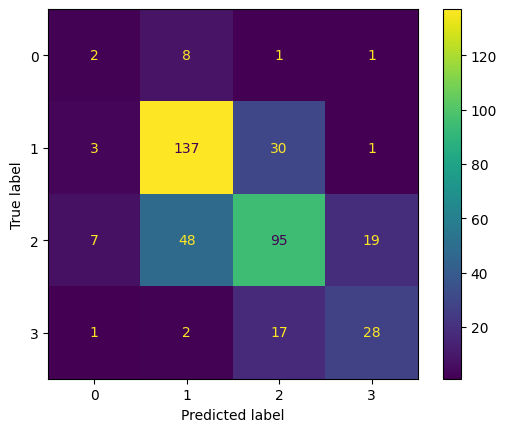

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.15      0.17      0.16        12
         5.0       0.70      0.80      0.75       171
         6.0       0.66      0.56      0.61       169
         7.0       0.57      0.58      0.58        48

    accuracy                           0.66       400
   macro avg       0.52      0.53      0.52       400
weighted avg       0.65      0.66      0.65       400



## Implementamos el segundo modelo con las mejores caracteristicas y los mejores parámetros

In [ ]:
svm.fit(X_train_scaled_selected, y_train) 

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_train=svm.predict(X_train_scaled_selected)
accuracy_score(y_train, y_pred_train)

0.5746455379482902

In [ ]:
y_pred=svm.predict(X_test_scaled_selected)
accuracy_score(y_test, y_pred)

0.6

In [ ]:
# Evaluar el modelo
y_pred = svm.predict(X_test_scaled_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy con características seleccionadas:", accuracy)

Accuracy con características seleccionadas: 0.6


## Ajuste de hiperparámetros para el clasificador SVM para las mejores caracteristicas

In [ ]:
grid.fit(X_train_scaled_selected, y_train.flatten())
# Imprimimos los mejores hiperparámetros encontrados
print('Mejores hiperparámetros encontrados:')
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
results=results_crossValidation(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
kernel,,,,,,,,,,,,,,,,,,,,,
1_scale_rbf,0.075444,0.003336,0.024104,0.000175,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.604167,0.562500,...,0.602162,0.028052,1,0.640250,0.648592,0.641293,0.627737,0.634375,0.638450,0.007008
10_scale_rbf,0.049688,0.001546,0.011636,0.000472,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.608333,0.558333,...,0.597179,0.021063,2,0.708029,0.691345,0.698644,0.698644,0.703125,0.699958,0.005528
100_scale_rbf,0.084482,0.007090,0.011324,0.000332,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.629167,0.575000,...,0.596360,0.031426,3,0.786236,0.797706,0.803962,0.799791,0.796875,0.796914,0.005876
100_auto_rbf,0.055323,0.010515,0.012684,0.001052,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.595833,0.541667,...,0.590488,0.027613,4,0.616267,0.622523,0.622523,0.599583,0.603125,0.612804,0.009689
100_0.001_linear,0.089328,0.002389,0.012679,0.000209,100,0.001,linear,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.612500,0.558333,...,0.589637,0.024876,5,0.603754,0.607925,0.604797,0.578728,0.600000,0.599041,0.010467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10_0.01_poly,0.060858,0.002078,0.015349,0.000960,10,0.01,poly,"{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}",0.425000,0.425000,...,0.425356,0.000711,51,0.425443,0.425443,0.425443,0.425443,0.425000,0.425355,0.000177
1_scale_sigmoid,0.111726,0.005129,0.022015,0.001502,1,scale,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.366667,0.420833,...,0.410324,0.038510,77,0.391032,0.394161,0.394161,0.433785,0.394792,0.401586,0.016153
100_scale_sigmoid,0.047076,0.001394,0.011786,0.000615,100,scale,sigmoid,"{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.375000,0.354167,...,0.392859,0.027037,78,0.385819,0.415016,0.393118,0.353493,0.426042,0.394697,0.025197


In [ ]:
# Evaluamos el modelo utilizando el conjunto de prueba y reportamos las métricas de clasificación
y_pred = grid.predict(X_test_scaled_selected)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM: {:.2f}".format(accuracy))

Precisión del modelo SVM: 0.62


## Analizamos la matriz de confusión y el f1-score despues de ajustar parametros, con las mejores caracteristicas, y el primer clasificador.

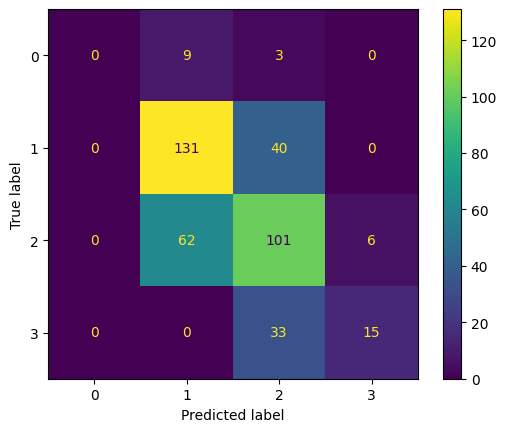

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[4,5,6,7])
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        12
         5.0       0.65      0.77      0.70       171
         6.0       0.57      0.60      0.58       169
         7.0       0.71      0.31      0.43        48

    accuracy                           0.62       400
   macro avg       0.48      0.42      0.43       400
weighted avg       0.60      0.62      0.60       400



# Conclusiones

- El mejor clasificador que se adapta al caso es el Perceptrón multicapa, se muestra un mejor rendimiento, además cuando analizamos el accuracy y la matriz de confusión se muestran mejores resultados, pero solo cuando se usan todas las caracteristicas, por lo tanto, es mejor trabajar con todas ya que tienen casi la misma importancia, al usar menos caracteristicas el rendimiento bajó.

- La selección de características puede mejorar el rendimiento del modelo al eliminar características redundantes o irrelevantes que no contribuyen a la clasificación correcta de las instancias. Se seleccionaron las 7 mejores caracteristicas, sin embargo, no se vió una mejora en los clasificadores, funciona mejor cuando se dejan todas las caracteristicas.

- Se calcularon las medidas de rendimiento por cada clase y se visualizó el promedio, conocido como  "macro avg", se logra evidenciar que el perceptrón multicapa con ajuste de hiperparametros y con todas las caracteristicas cuenta con el valor más alto (aunque no excelente).

- El clasificador SVM no logró mejorar los parámetros, de hecho, el primer clasificador que usamos (perceptrón) tampoco poco mostró resultados optimos, hay clases que tienen muchas muestras (>600) a diferencia de otras que solo tiene (<150), se debería muestrar más datos para mejores resultados.

- Hay algunas limitaciones al utilizar el accuracy score como métrica de evaluación del modelo. Por ejemplo, si hay un desequilibrio entre las clases de datos (por ejemplo, si una clase está muy representada en comparación con las demás), el accuracy score puede ser engañoso y no reflejar la verdadera capacidad predictiva del modelo. En este caso, otras métricas, como la sensibilidad y la especificidad, pueden ser más adecuadas.

- El F1 Score tambien tiene algunas limitaciones. Por ejemplo, el F1 Score no tiene en cuenta los verdaderos negativos, lo que puede ser importante en algunos problemas de clasificación. Además, el F1 Score puede ser engañoso si las clases de datos no están bien equilibradas como en este ejemplo donde tenemos clases con un numero mayor de muestras.